Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [2]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [3]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# create feature 'Amenities' that has either a pool, high speed internet or a garden_patio and wheelchair acccess
df['amenities'] = df['high_speed_internet'] + df['swimming_pool'] + df['garden_patio'] + df['wheelchair_access']

# create feature total rooms.
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [5]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,amenities,total_rooms
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,4.5
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,3.0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,0,0,0,0,0,2.0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,0,0,0,0,0,2.0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,0,0,0,0,0,5.0


######  Create Test and Train DataFrames

In [6]:
# create a subset with just created column
created_date = list(df['created'])

# date_list = list(created_date)
created_date.sort()
len(created_date)

train_test = []

# create train test list with june as true and april and may as false
for i in range(0,len(created_date)):
    if created_date[i][6:7] == '6':
        train_test.append(True)
    else:
        train_test.append(False)


In [7]:
# create train dataframe from April and May data
df['created'] = train_test
train = df[df['created'] == False]

# create test dataframe from June data
test = df[df['created'] == True]
print(train.shape, test.shape)

(31844, 36) (16973, 36)


###### Baseline Model

In [8]:
train['price'].mean()

3579.9834191684463

In [9]:
y_train = train['price']
y_test = test['price']
base_guess = y_train.mean()

In [10]:
# train error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

y_base_pred = [base_guess] * len(y_train)
mae_train = mean_absolute_error(y_train, y_base_pred)
rmse_train = sqrt(mean_squared_error(y_train, y_base_pred))

print(f'Mean Absolute Error: ${mae_train:,.2f}')
print(f'Root Mean Square Error: ${rmse_train:,.2f}')

Mean Absolute Error: $1,199.58
Root Mean Square Error: $1,759.96


In [11]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3097455.660069254
Root Mean Squared Error: 1759.9589938601564
Mean Absolute Error: 1199.5765992488093
R^2: 0.0


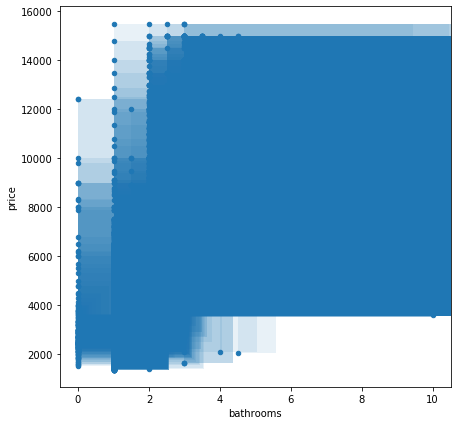

In [12]:
feature = 'bathrooms'
target = 'price'
squared_errors(train, feature, target, m=0, b=y_train.mean())

In [13]:
# test error
y_base_pred = [base_guess] * len(y_test)
mae_test = mean_absolute_error(y_test, y_base_pred)
rmse_test = sqrt(mean_squared_error(y_test, y_base_pred))

print(f'Mean Absolute Error: ${mae_test:,.2f}')
print(f'Root Mean Squared Error: ${rmse_test:,.2f}')

Mean Absolute Error: $1,205.52
Root Mean Squared Error: $1,767.01


###### Linear Regression Model  Multiple features

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# instantiate the model
model = LinearRegression()

In [16]:
features = ['amenities', 'total_rooms', 'new_construction']
target = 'price'

In [17]:
# create train matrix and vector
X_train = train[features]
X_test = test[features]
y_train = train[target]

# fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# prediction for the training data
y_pred_train = model.predict(X_train)

# calculate the MAE
mae_train = mean_absolute_error(y_train, y_pred_train)

# calculate RSME
rsme_train = sqrt(mean_squared_error(y_train, y_pred_train))

# calculate R^2
r2_train = model.score(X_train, y_train)

# print Errors
print(f'Mean Absolute Error: ${mae_train:,.2f}')
print(f'Root Squared Mean Error: ${rmse_train:,.2f}')
print(f'R^2: {r2_train:,.3f}')

Mean Absolute Error: $894.95
Root Squared Mean Error: $1,759.96
R^2: 0.430


In [19]:
#prediction for test data 
y_pred_test = model.predict(X_test)

# Calculate MAE
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate RSME
rsme_test = sqrt(mean_squared_error(y_test, y_pred_test))

# Calculate R^2
r2_test = model.score(X_test, y_test)

# Print Errors
print(f'Mean Absolute Error: ${mae_test:,.2f}')
print(f'Root Squared Mean Error: ${rmse_test:,.2f}')
print(f'R^2: {r2_test:,.3f}')

Mean Absolute Error: $886.58
Root Squared Mean Error: $1,767.01
R^2: 0.431


In [20]:
model.intercept_, model.coef_

(1333.874894847083, array([291.33078738, 795.0370741 , 147.74420711]))

In [21]:
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

amenities           291.330787
total_rooms         795.037074
new_construction    147.744207
